In [1]:
#data and lib import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.losses import MeanSquaredError
from model_tf_1 import *
from model_tf_2 import *


# Read the original and edited training data into Pandas DataFrames
train = pd.read_csv("../Data/Data.csv.gz", compression="gzip")


C:\Users\2002g\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [2]:
# Assuming trainED contains both X and y data
# Split the data into X and y
X = np.array([np.fromstring(x, dtype=float, sep=' ') for x in train['Image']])
y = np.array(train.drop('Image', axis=1))

# Reshape X and normalize
img_size = 96
X = X.reshape(-1, img_size, img_size, 1) / 255.0

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Convert y_train to a numpy array
y_train = np.array(y_train, dtype='float32')



In [3]:


optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics = [tf.keras.metrics.Accuracy()])
history = model_1.fit(X_train.reshape(-1, 96, 96, 1), y_train, epochs=5, batch_size=16,validation_split=0.2)

optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics = [tf.keras.metrics.Accuracy()])
history2 = model_2.fit(X_train.reshape(-1, 96, 96, 1), y_train, epochs=5, batch_size=16,validation_split=0.2)

Epoch 1/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.0000e+00 - loss: 985.0270 - val_accuracy: 0.0000e+00 - val_loss: 26.0852
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.0000e+00 - loss: 166.6309 - val_accuracy: 0.0000e+00 - val_loss: 17.8255
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.0000e+00 - loss: 127.1569 - val_accuracy: 0.0000e+00 - val_loss: 16.0531
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.0000e+00 - loss: 105.9282 - val_accuracy: 0.0000e+00 - val_loss: 24.3633
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.0000e+00 - loss: 90.8739 - val_accuracy: 0.0000e+00 - val_loss: 10.6111
Epoch 1/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 76s 393ms/step - accuracy: 0.0000e+00 - loss: 2562.4146 - val_accuracy: 0.0000e+00 - val_loss: 1979.6271
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 70s 383ms/step - accuracy: 0.0000e+00 - loss: 1348.8854 - val_accuracy: 0.0000e+00 - val_loss: 176.2882
Epoch 3/5
182/1

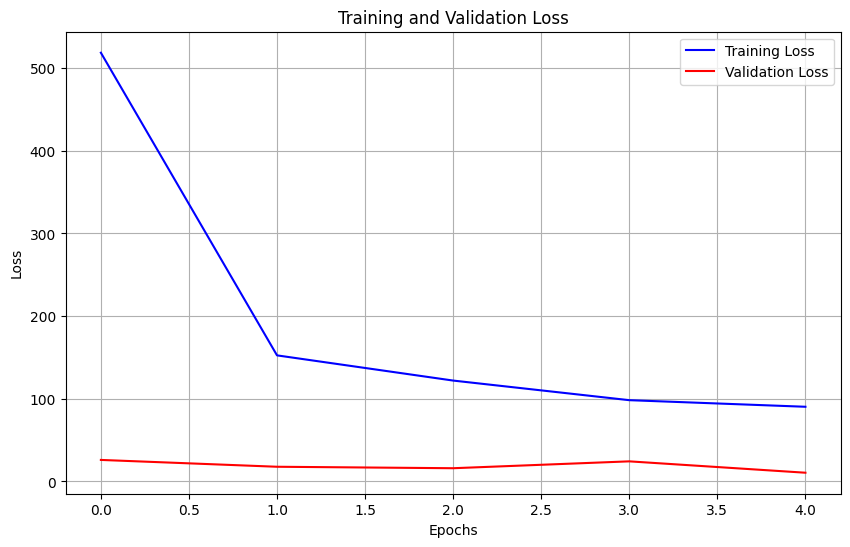

In [4]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(len(training_loss))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

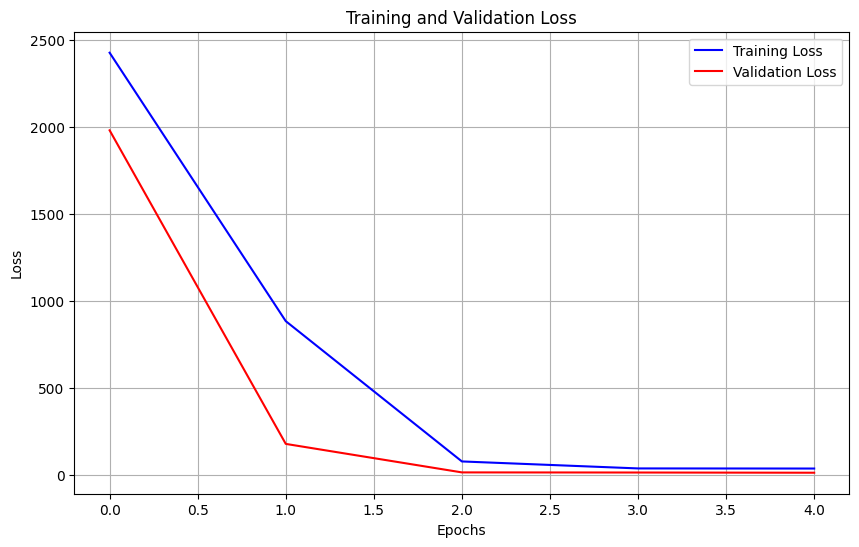

In [5]:
training_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']
epochs2 = range(len(training_loss2))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs2, training_loss2, 'b', label='Training Loss')
plt.plot(epochs2, validation_loss2, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
y_test_pred = model_1.predict(X_test)
y_test_pred2 = model_2.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


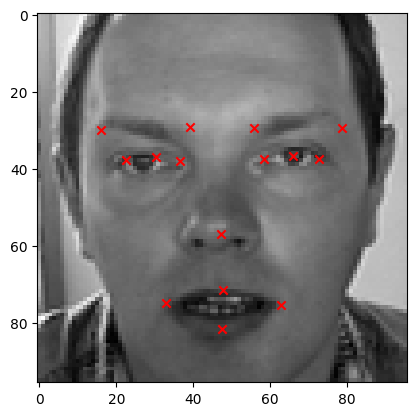

In [7]:
t = y_test_pred[1]
plt.imshow(X_test[1], cmap='gray')
plt.scatter(t[0::2], t[1::2], c='red', marker='x')

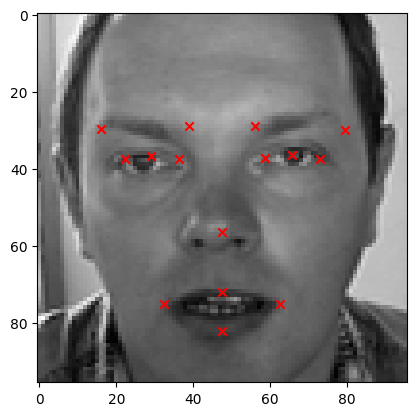

In [8]:
t2 = y_test_pred2[1]
plt.imshow(X_test[1], cmap='gray')
plt.scatter(t2[0::2], t2[1::2], c='red', marker='x')

In [9]:
model_1.save("model_kaggle.h5")
model_2.save("model2_kaggle.h5")

In [10]:
model_1 = tf.keras.models.load_model("model_kaggle.h5")
model_2 = tf.keras.models.load_model("model2_kaggle.h5")
y1 = model_1.predict(X_test)
y2 = model_2.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


In [11]:
test_samples =0
accurate_samples=0

for i in range(0, len(y_test)):
        test_samples+=30
        accurate_samples+=(abs(y_test[i] - y1[i])<2).sum().item()
        if(i%50==0):
            print(f"test set elements: {i}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")
print(f"test set elements: {len(y_test)}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")
    

test set elements: 0, test_samples: 30, accurate_samples: 7 accuracy: 23.333333333333332%
test set elements: 50, test_samples: 1530, accurate_samples: 843 accuracy: 55.09803921568628%
test set elements: 100, test_samples: 3030, accurate_samples: 1707 accuracy: 56.33663366336633%
test set elements: 150, test_samples: 4530, accurate_samples: 2534 accuracy: 55.93818984547462%
test set elements: 200, test_samples: 6030, accurate_samples: 3415 accuracy: 56.633499170812605%
test set elements: 250, test_samples: 7530, accurate_samples: 4220 accuracy: 56.04249667994687%
test set elements: 300, test_samples: 9030, accurate_samples: 5102 accuracy: 56.500553709856035%
test set elements: 350, test_samples: 10530, accurate_samples: 5911 accuracy: 56.134852801519465%
test set elements: 400, test_samples: 12030, accurate_samples: 6736 accuracy: 55.99334995843724%
test set elements: 450, test_samples: 13530, accurate_samples: 7636 accuracy: 56.43754619364375%
test set elements: 500, test_samples: 1503

In [12]:
test_samples =0
accurate_samples=0

for i in range(0, len(y_test)):
        test_samples+=30
        accurate_samples+=(abs(y_test[i] - y2[i])<2).sum().item()
        if(i%50==0):
            print(f"test set elements: {i}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")
print(f"test set elements: {len(y_test)}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")

test set elements: 0, test_samples: 30, accurate_samples: 8 accuracy: 26.666666666666668%
test set elements: 50, test_samples: 1530, accurate_samples: 819 accuracy: 53.529411764705884%
test set elements: 100, test_samples: 3030, accurate_samples: 1669 accuracy: 55.08250825082508%
test set elements: 150, test_samples: 4530, accurate_samples: 2471 accuracy: 54.54746136865343%
test set elements: 200, test_samples: 6030, accurate_samples: 3355 accuracy: 55.63847429519071%
test set elements: 250, test_samples: 7530, accurate_samples: 4167 accuracy: 55.33864541832669%
test set elements: 300, test_samples: 9030, accurate_samples: 5043 accuracy: 55.84717607973422%
test set elements: 350, test_samples: 10530, accurate_samples: 5853 accuracy: 55.58404558404558%
test set elements: 400, test_samples: 12030, accurate_samples: 6666 accuracy: 55.41147132169576%
test set elements: 450, test_samples: 13530, accurate_samples: 7568 accuracy: 55.93495934959349%
test set elements: 500, test_samples: 15030,

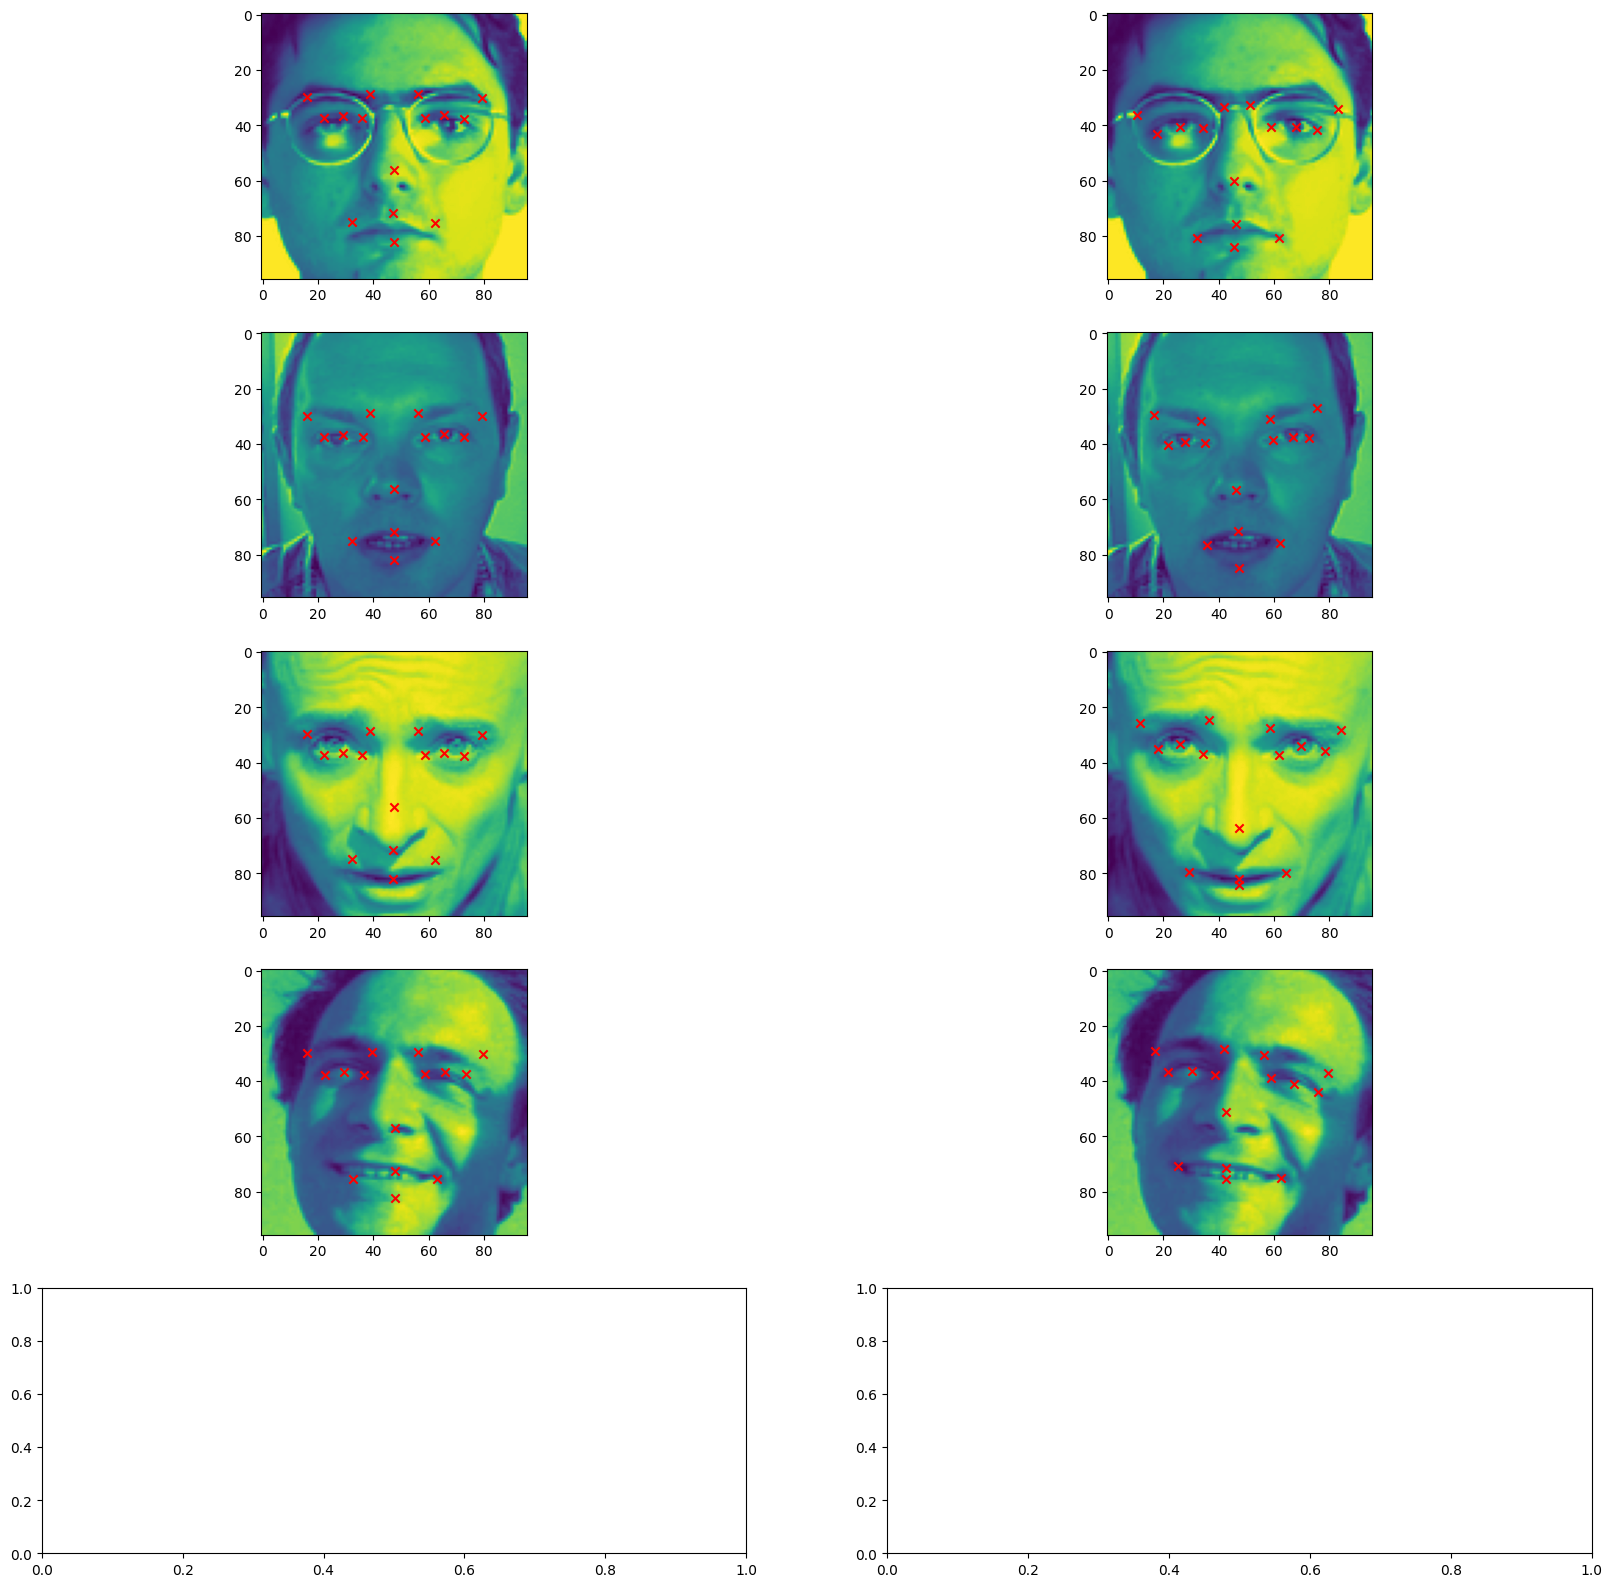

In [13]:
fig2,ax2=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
for i in range(4):
    Pred=y2[i]
    Actual= y_test[i]
    Im=X_test[i]
    ax2[i,0].imshow(Im)
    ax2[i,1].imshow(Im)          
    ax2[i,0].scatter(Pred[0::2], Pred[1::2], c='red', marker='x')
    ax2[i,1].scatter(Actual[0::2], Actual[1::2], c='red', marker='x')
plt.show()
plt.savefig()